# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**
...

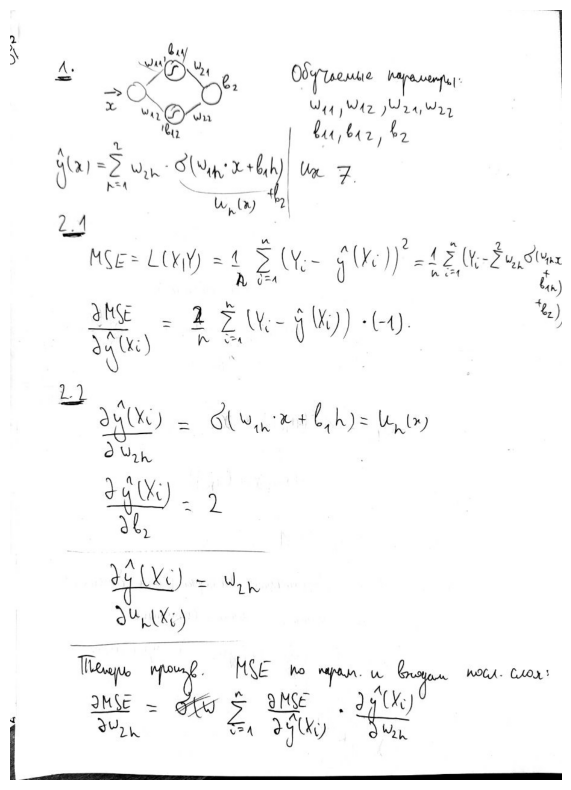

In [6]:
from PIL import Image

# Load image
image_path = '/content/img1.jpg'  # Adjust the path as per your image location
image = Image.open(image_path)

import matplotlib.pyplot as plt

# Display image
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

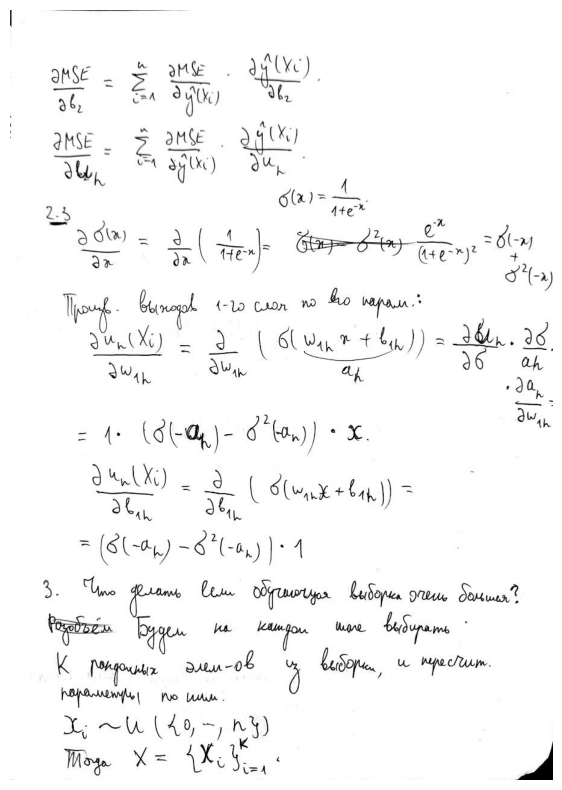

In [7]:
from PIL import Image

# Load image
image_path = '/content/img2.jpg'  # Adjust the path as per your image location
image = Image.open(image_path)

import matplotlib.pyplot as plt

# Display image
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

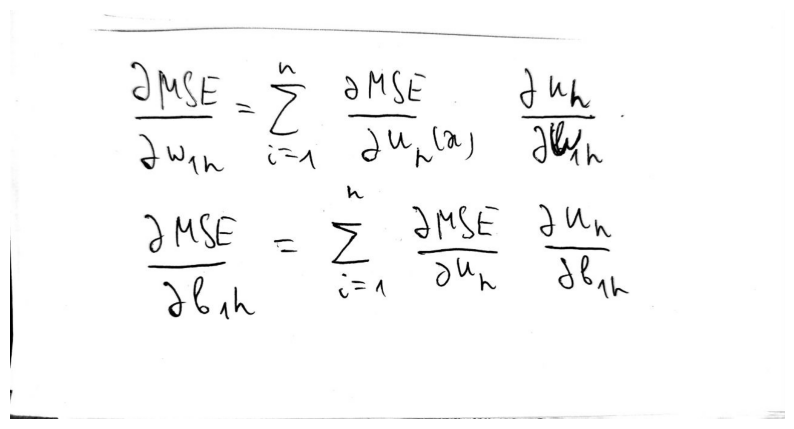

In [11]:
from PIL import Image

# Load image
image_path = '/content/img4.jpg'  # Adjust the path as per your image location
image = Image.open(image_path)

import matplotlib.pyplot as plt

# Display image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

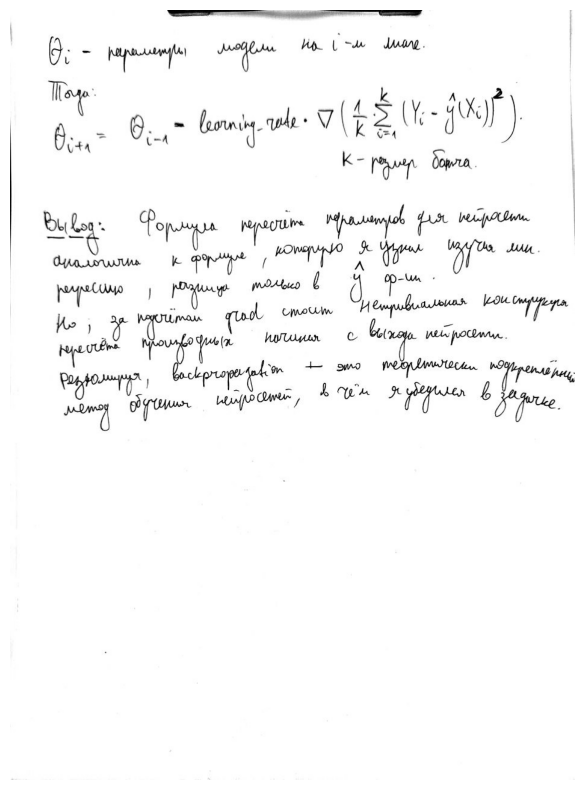

In [13]:
from PIL import Image

# Load image
image_path = '/content/img3.jpg'  # Adjust the path as per your image location
image = Image.open(image_path)

import matplotlib.pyplot as plt

# Display image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [2]:
import torch
from torch import nn

model = nn.Sequential(
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=1, out_features=2),
    # та же ф-ция активации, что и раньше, только из pytorch
    nn.Sigmoid(),
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=2, out_features=1)
)
model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [3]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = X ** 3;

X = np.reshape(X, (sample_size));
y = np.reshape(y, (sample_size));
train_part = (sample_size // 10) * 7;

x_train, x_test = X[:train_part], X[train_part:]
y_train, y_test = y[:train_part], y[train_part:]
print(x_train.shape)

assert y.shape == (sample_size,)

for name, param in model.named_parameters():
    print(name)
    print(param.data)

x_train = torch.tensor(x_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

x_test = torch.tensor(x_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

(700000,)
0.weight
tensor([[-0.0249],
        [ 0.8083]])
0.bias
tensor([ 0.4618, -0.0563])
2.weight
tensor([[-0.0440, -0.2178]])
2.bias
tensor([-0.3368])


Обучите нейросеть на этих данных. Используйте код с занятия.

In [7]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Открепим переменную от вычислительного графа перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.show()

    print(f"MSE = {loss:.3f}")

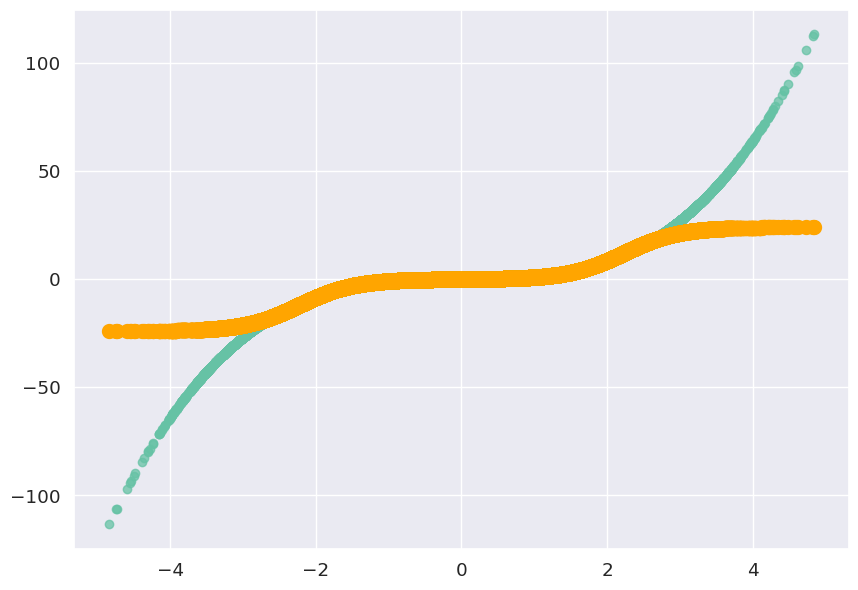

MSE = 0.844


In [11]:
learning_rate = 0.01;

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate);
optim_func = nn.MSELoss()

# Количество итераций
num_iter = 20000

x_train = torch.reshape(x_train, (train_part, 1));
y_train = torch.reshape(y_train, (train_part, 1));
print("a")
loss = 0;
for i in range(num_iter):
    # Forward pass: предсказание модели по данным x_new
    y_pred = model(x_train)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    prev_loss = loss;
    loss = optim_func(y_pred, y_train);

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()
    if(i % 1000 == 0):
      print(f"Iteration no. {i}")
    if (i + 1) % 5000 == 0:
        show_progress(x_train, y_train, y_pred, loss)
    if(abs(loss) < 0.1):
        print("Done!")


Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

In [6]:
x_test = torch.reshape(x_test, (sample_size - train_part, 1));
y_test = torch.reshape(y_test, (sample_size - train_part, 1));

y_pred = model(x_test);
loss = optim_func(y_pred, y_test);

show_progress(x_test, y_test, y_pred, loss)

NameError: name 'optim_func' is not defined

**Вывод:**
Backpropagation является идеальным подходом для обучения нейросетей, но он работает очень медленно. В этом задании я аппроксимировал непрерывную функцию с помощью нейросети, что возможно по теореме Цыбенко(Universal approximation theorem)

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [107]:
import math
import random
import sys

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def MSE(Y_real, Y, X, params):
  '''
    Y_Real, Y - numpy array (sample_size,)
  '''
  Y_real = np.reshape(Y_real, (Y_real.shape[0]));
  Y =np.reshape(Y, (Y_real.shape[0]));
  X =np.reshape(X, (Y_real.shape[0]));

  loss = ((Y_real - Y) ** 2).astype(float).sum() * (1 / Y.shape[0]);
  grad = np.zeros(7);

  a1 = params[3]*X + params[5];
  a2 = params[4]*X + params[6];
  sigm1 = sigmoid(a1)
  sigm2 = sigmoid(a2);

  grad[0] = (-4) * (Y_real - Y).sum() * (1 / Y.shape[0]);
  grad[1] = (-2) * (( (Y_real - Y) * sigm1).sum() * (1 / Y.shape[0])).sum();
  grad[2] = (-2) * (( (Y_real - Y) * sigm2).sum() * (1 / Y.shape[0])).sum();

  grad[3] = (-2) * ((Y_real - Y) * params[1] * (sigmoid(-a1) - sigmoid(-a1) ** 2 ) * X).sum();
  grad[4] = (-2) * ((Y_real - Y) * params[2] * (sigmoid(-a2) - sigmoid(-a2) ** 2 ) * X).sum();

  grad[5] = (-2) * ((Y_real - Y) * params[1] * (sigmoid(-a1) - sigmoid(-a1) ** 2 ) ).sum();
  grad[6] = (-2) * ((Y_real - Y) * params[1] * (sigmoid(-a2) - sigmoid(-a2) ** 2 ) ).sum();
  return [loss, grad];

class MyModel:
    def __init__(self, batch_size = 0, lr=0.001):
        '''
        Инициализация модели.

        Аргументы:
        batch_size -- размер случайного батча. Если не указан, то используется весь датасет одновременно
        '''

        self.batch_size = batch_size
        self.lr = lr;
        self.params = None;
    def fit(self, X, Y, lr=0.001):
        '''
        Обучение модели.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''

        # 0. инициализировать веса рандомом, байасы - 0
        # 1. обнулить градиенты
        # 2. посчитать предсказание
        # 3. посчитать лосс и его градиенты по всем переменным
        params = np.zeros(7);
        params[[1,2,3,4]] = random.random()
        self.params = params;

        #инициализируем веса рандомными числами

        num_iter = 20000;

        for i in range(num_iter):
          #генерируем индексы рандомного батча
          if self.batch_size != 0:
            indices = np.random.randint(0, X.shape[0], size=self.batch_size);

            Y_pred = self.predict(X[indices]);

            res = MSE(Y[indices].reshape(self.batch_size), Y_pred.reshape(self.batch_size), X[indices].reshape(self.batch_size), params);
          else:
            Y_pred = self.predict(X);

            res = MSE(Y, Y_pred, X, params);
          params -= lr * res[1]; #идём в -grad
          self.params = params;

          if(i % 1000 == 0):
            print(f"Iteration no. {i}, loss: {res[0]}");

        return self


    def predict(self, X):
        '''
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''

        sigm1 = sigmoid(self.params[3] * X + self.params[5]);
        sigm2 = sigmoid(self.params[4] * X + self.params[6]);

        pred = (self.params[1] * sigm1) + (self.params[2] * sigm2) + 2 * self.params[0]

        return np.reshape(pred, (X.shape[0], 1));


    def get_params(self):
        return self.params

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [108]:
numpy_model = MyModel(100);
#print(x_train[:100].detach().numpy())
numpy_model.fit(x_train.detach().numpy().reshape((train_part, 1)), y_train.detach().numpy().reshape((train_part, 1)));

Iteration no. 0, loss: 6.210248864921741
Iteration no. 1000, loss: 10.159145975629945
Iteration no. 2000, loss: 3.3333420612834015
Iteration no. 3000, loss: 10.78903715197542
Iteration no. 4000, loss: 5.337711996055259
Iteration no. 5000, loss: 17.815567710793477
Iteration no. 6000, loss: 7.925775562291874
Iteration no. 7000, loss: 6.624992799363099
Iteration no. 8000, loss: 17.974636382340687
Iteration no. 9000, loss: 1.2174990524718305
Iteration no. 10000, loss: 7.469130901041208
Iteration no. 11000, loss: 5.375208293978358
Iteration no. 12000, loss: 3.5457342222309673
Iteration no. 13000, loss: 21.336950090517604
Iteration no. 14000, loss: 4.356274096993448
Iteration no. 15000, loss: 3.0462656602007336
Iteration no. 16000, loss: 3.1079517218109687
Iteration no. 17000, loss: 1.3262861232686556
Iteration no. 18000, loss: 6.5885566251788985
Iteration no. 19000, loss: 5.6762946988386105


Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [112]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [119]:
numpy_pred = numpy_model.predict(x_test.detach().numpy().reshape(x_test.shape[0], 1));

print(f"Numpy model MSE: {((y_test - numpy_pred) ** 2).sum() * (1 / y_test.shape[0])}")

model = LinearRegression(fit_intercept=True);
model.fit(x_train[:10000].detach().numpy().reshape(10000, 1), y_train[:10000].detach().numpy().reshape(10000));

Numpy model MSE: 7.874476432800293


In [123]:
test_preds = model.predict(x_test.reshape(x_test.shape[0], 1))

print("Linear Regression MSE: "+str(metrics.mean_squared_error(y_test, test_preds)))

Linear Regression MSE: 6.149884


Повторите вычисления для другой нелинейной функции $y(x)$.

**Вывод:**
Для обучения моей нейросети требуется больше времени, чем на обучение линейной регрессии, если добавить итерация на обучение MyModel, то она превзойдёт линейную регрессию